In [3]:
from pyplasm import *
from larlib import *

Evaluating fenvs.py..
('...fenvs.py imported in', 0.005983000000000072, 'seconds')


![424-VillaMalcontenta.png](img/424-VillaMalcontenta.png)

![VillaFoscari_2007_07_10_02.jpg](img/VillaFoscari_2007_07_10_02.jpg)

In [14]:
def stanza (x,y,z):
    cubo = CUBOID([x+3,y+3,z])
    cuboDaSottrarre = T([1,2])([4,4])(CUBOID([x-4,y-4,z]))
    return DIFFERENCE([cubo,cuboDaSottrarre])

![Schermata%202018-06-12%20alle%2010.54.03.png](attachment:img/Schermata%202018-06-12%20alle%2010.54.03.png)

![Schermata%202018-06-12%20alle%2010.54.03.png](img/Schermata%202018-06-12%20alle%2010.54.03.png)

In [11]:
def texturepianoterra(h):
    paretelaterale=CUBOID([0.3,696,h])
    finestra=CUBOID([0.3,50,50])
    porta=CUBOID([0.3,50,100])
    paretelaterale=DIFFERENCE([paretelaterale,T([2,3])([509,100])(finestra),T([2,3])([321.5,106])(finestra),T(2)(104)(porta)])
    paretetexture=TEXTURE("pietre.jpg")(paretelaterale)
    return paretetexture

In [12]:
def texturefrontale(h):
    paretefrontale=CUBOID([1112,0.3,h])
    finestra=CUBOID([0.3,50,50])
    paretefrontale=DIFFERENCE([paretefrontale,T([1,3])([113.5,100])(finestra),T([1,3])([321,100])(finestra),
                     T([1,3])([737,100])(finestra),T([1,3])([945.5,100])(finestra)])
    return TEXTURE("pietre.jpg")(paretefrontale)

In [15]:
def groundzero(h):
#costruisco stanza per stanza 
    stanza1=stanza(416,208,h)
    stanza2=stanza(416,208,h)
    stanza3=stanza(277,277,h)
    stanza4=stanza(277,277,h)
    stanza5=stanza(277,208,h)
    stanza6=stanza(277,208,h)
    stanza7=stanza(139,208,h)
    stanza8=stanza(139,208,h)
#costruisco la grande stanza a croce centrale
    croce1=(stanza(277,693,h))
    croce2=stanza(555,277,h)
    croce=STRUCT([T([1,2])([-138,208])(croce2),croce1])
    stanzacentrale=DIFFERENCE([croce,T(2)(208)(stanza(277,277,h))])
    primoasset=STRUCT([stanza1,T(1)(693)(stanza2),T(1)(416)(stanzacentrale)])
    secondoasset=STRUCT([primoasset,T(2)(208)(stanza4),T(2)(485)(stanza6),T([1,2])([277,485])(stanza8)])
    terzoasset=STRUCT([secondoasset,T([1,2])([832,208])(stanza3),T([1,2])([832,485])(stanza5),T([1,2])([693,485])(stanza7)])
    cubo=CUBOID([555,3,h])
    terzoasset=DIFFERENCE([terzoasset,T([1,2])([277,693])(cubo)])
    return terzoasset
VIEW(groundzero(175))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x1182148a0> >

![Schermata%202018-06-07%20alle%2017.59.11.png](img/Schermata%202018-06-07%20alle%2017.59.11.png)

In [6]:
#metto i buchi per le porte
def mettiporte():
    porte=STRUCT([T(1)(529.5)(CUBOID([50,12,150])),T([1,2])([416,79])(CUBOID([12,50,150])),T([1,2])([693,79])(CUBOID([12,50,150]))
                ,T([1,2])([113.5,208])(CUBOID([50,12,150])),T([1,2])([945.5,208])(CUBOID([50,12,150]))
                ,T([1,2])([113.5,485])(CUBOID([50,12,150])),T([1,2])([945.5,485])(CUBOID([50,12,150])),T([1,2])([277,321.5])(CUBOID([12,50,150])),T([1,2])([832,321.5])(CUBOID([12,50,150])),
                T([1,2])([832,564])(CUBOID([12,50,150])),T([1,2])([277,564])(CUBOID([6,50,150]))])
    piano=groundzero(175)
    pian0piuporte=DIFFERENCE([piano,porte])
    return pian0piuporte
#frontale=TEXTURE("pietre.jpg")(T(2)(-0.1)(CUBOID([1112,0.7,175])
#porte=mettiporte()

In [7]:
#stanzaporticatoDX=DIFFERENCE([stanza(250,200,175),T([1,3])([50,100])(CUBOID([50,6,50])),T([1,3])([150,100])(CUBOID([50,6,50]))])
#stanzaporticatoSX=stanzaporticatoDX

In [8]:
#VIEW(porte)

In [9]:
def mettifinestre(piano):
    finestre=STRUCT([T([2,3])([509,100])(CUBOID([12,50,50])),
                     T(2)(104)(CUBOID([12,50,100])),T([2,3])([321.5,100])(CUBOID([12,50,50])),
                     T([1,2])([1100,104])(CUBOID([12,50,100])),T([1,2,3])([1100,321.5,100])(CUBOID([12,50,50])),
                     T([1,2,3])([1100,509,100])(CUBOID([12,50,50]))])
    finestre=STRUCT([T([1,2,3])([113.5,693,100])(CUBOID([50,12,50])),T([1,2,3])([321,693,100])(CUBOID([50,12,50])),
                     T([1,2,3])([737,693,100])(CUBOID([50,12,50])),T([1,2,3])([945.5,693,100])(CUBOID([50,12,50]))
                     ,finestre])
    nuovopiano=DIFFERENCE([piano,finestre])
    return nuovopiano

In [10]:
#primopiano=mettifinestre(porte)

In [11]:
def soffittopianoterra(piano):
    stanzaporticatoDX=DIFFERENCE([stanza(250,200,175),T([1,3])([50,100])(CUBOID([50,6,50])),T([1,3])([150,100])(CUBOID([50,6,50]))])
    stanzaporticatoSX=stanzaporticatoDX
    pianoterra=STRUCT([T(2)(200)(piano),T(1)(275)(stanzaporticatoDX),T([1,3])([525,150])(CUBOID([50,3,25])),T(1)(575)(stanzaporticatoDX)])
    pianoconsoffitto=STRUCT([T([1,3])([275,175])(CUBOID([550,200,6])),pianoterra,T([2,3])([200,175])(CUBOID([1110,693,6]))])
    return pianoconsoffitto

In [12]:
#pianoterra=soffittopianoterra(primopiano)
#VIEW(pianoterra)

In [13]:
def columna(dm,h,h_base):
    
    cylndr = COMP([JOIN,TRUNCONE([dm/2,0.8*(dm/2),h])])(24)
    
    torus_bot = COMP([JOIN,TORUS([dm/12,dm/2])])([8,24])
    
    torus_top = COMP([JOIN,TORUS([0.8*(dm/12),0.8*(dm/2)])])([8,27])
       
    base = COMP([T([1,2])([7*(dm/-12),7*(dm/-23)]),CUBOID])([7*(dm/6),7*(dm/6),h_base])
    
    base_top = COMP([T([1,2])([7*(dm/-12),7*(dm/-12)]),CUBOID])([7*(dm/6),7*(dm/6),dm/6])
    
    capital = SUM([COMP([JOIN,TRUNCONE([0.8*dm/2, 1.2*dm/2,h/8])])(4),COMP([R([1,2])(PI/4),JOIN,TRUNCONE([0.8*dm/2,1.2*dm/2,
                                                                                                         h/8])])(4)]) 
    return (TOP([TOP([TOP([TOP([TOP([base, torus_bot]), TEXTURE("texture/colonna.jpg")(cylndr)]), torus_top]), capital]), base_top]))

In [14]:
def colonnato(piano):
    colonna=columna(25,325,20)
    colonnato=STRUCT([T([1,2,3])([300,190,175])(colonna),T([1,2,3])([300,20,175])(colonna),T([1,2,3])([300,95,175])(colonna),
                      T([1,2,3])([407,20,175])(colonna),T([1,2,3])([515,20,175])(colonna),T([1,2,3])([621,20,175])(colonna),
                      T([1,2,3])([728,20,175])(colonna),T([1,2,3])([815,20,175])(colonna),
                      T([1,2,3])([815,95,175])(colonna),T([1,2,3])([815,190,175])(colonna),
                      piano])
    return colonnato
#VIEW(colonnato(pianoterra))
#pianoconcolonnato=colonnato(pianoterra)

![Schermata%202018-06-05%20alle%2010.06.39.png](img/Schermata%202018-06-05%20alle%2010.06.39.png)

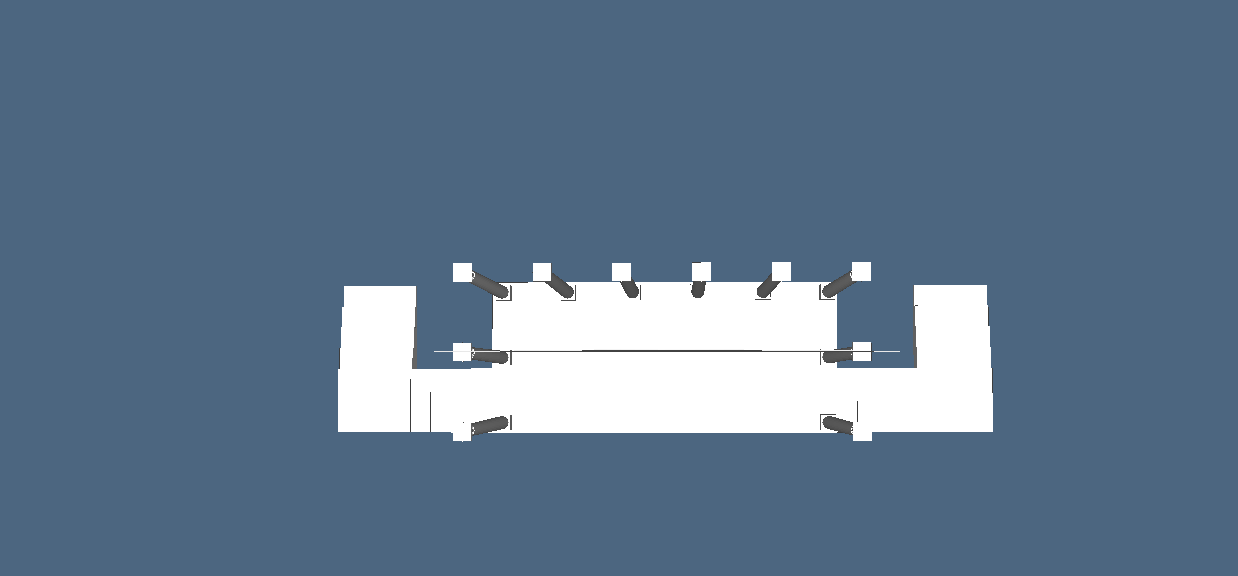

In [15]:
def iusscalam():
    gradus1=TEXTURE("texture/pietre.png")(CUBOID([137,40,19.44]))
    gradus2=TEXTURE("texture/pietre.png")(CUBOID([137,40,38.44]))
    gradus3=TEXTURE("texture/pietre.png")(CUBOID([137,40,58.32]))
    gradus4=TEXTURE("texture/pietre.png")(CUBOID([137,40,77.76]))
    portum=TEXTURE("texture/pietre.png")(CUBOID([137,200,97.20]))
    gradus5=TEXTURE("texture/pietre.png")(CUBOID([34.5,200,116.64]))
    gradus6=TEXTURE("texture/pietre.png")(CUBOID([34.5,200,136.08]))
    gradus7=TEXTURE("texture/pietre.png")(CUBOID([34.5,200,155.52]))
    gradus8=TEXTURE("texture/pietre.png")(CUBOID([34.5,200,175]))
    return (STRUCT([portum,T([1,2])([0,200])(gradus4),T([1,2])([0,240])(gradus3),
                          T([1,2])([0,280])(gradus2),T([1,2])([0,320])(gradus1),T([1,2])([137,0])(gradus5),
                          T([1,2])([171.5,0])(gradus6),T([1,2])([206,0])(gradus7),T([1,2])([240.5,0])(gradus8)]))            

In [16]:
def gradussinistram():
    gradus1=TEXTURE("texture/pietre.png")(CUBOID([137,40,19.44]))
    gradus2=TEXTURE("texture/pietre.png")(CUBOID([137,40,38.44]))
    gradus3=TEXTURE("texture/pietre.png")(CUBOID([137,40,58.32]))
    gradus4=TEXTURE("texture/pietre.png")(CUBOID([137,40,77.76]))
    portum=TEXTURE("texture/pietre.png")(CUBOID([137,200,97.20]))
    gradus5=TEXTURE("texture/pietre.png")(CUBOID([34.5,200,116.64]))
    gradus6=TEXTURE("texture/pietre.png")(CUBOID([34.5,200,136.08]))
    gradus7=TEXTURE("texture/pietre.png")(CUBOID([34.5,200,155.52]))
    gradus8=TEXTURE("texture/pietre.png")(CUBOID([34.5,200,175]))
    return (STRUCT([portum,T([1,2])([0,200])(gradus4),T([1,2])([0,240])(gradus3),
                          T([1,2])([0,280])(gradus2),T([1,2])([0,320])(gradus1),T([1,2])([-34.5,0])(gradus5),
                          T([1,2])([-69,0])(gradus6),T([1,2])([-103.5,0])(gradus7),T([1,2])([-138,0])(gradus8)])) 

![Schermata%202018-06-07%20alle%2019.12.15.png](img/Schermata%202018-06-07%20alle%2019.12.15.png)

In [17]:
def Gable (radius,h,n): 
    lastX = n*3*(2*radius*1.2)
    triangle = MKPOL([[[0,0],[lastX,0],[lastX/2.0,h/2]],[[1,2,3]],[[1]]])
    return R([2,3])(PI/2)(POWER([triangle,QUOTE([radius*400])]))

def triangolo(piano):
    lastra=COLOR([0.59,0.46,0.32])(CUBOID([720,200,20]))
    porticaten=STRUCT([piano,T([1,3])([187.5,580])(lastra)])
    gable=Gable(1,360,100)
    c=Gable(1,320,90)
    gable=DIFFERENCE([gable,T(2)([203])(CUBOID([7550,200,900]))])
    c=DIFFERENCE([c,T(2)([203])(CUBOID([7550,200,900]))])
    gable=COLOR([0.59,0.46,0.32])(gable)
    c=COLOR(WHITE)(c)
    gable=STRUCT([gable,T([1,2])(35)(c)])
    struttura = STRUCT([porticaten,T([1,2,3])([187.5,400,600])(gable)])
    return struttura

In [18]:
def completamentopianoterra(pianocolonnato):
    gradinoSX=R([1,2])(PI)(gradussinistram())
    gradinoDX=R([1,2])(PI)(iusscalam())
    return STRUCT([T([1,2])([139,200])(gradinoSX),pianoconcolonnato,T([1,2])([1103,200])(gradinoDX)])

![Schermata%202018-06-09%20alle%2020.26.50.png](img/Schermata%202018-06-09%20alle%2020.26.50.png)

In [19]:
#pianotera=completamentopianoterra(pianoconcolonnato)
#pianotera=triangolo(pianotera)
#VIEW(pianotera)

In [ ]:
def firstfloor(h):
    attic=groundzero(h)
    finestregrandi=CUBOID([50,12,175])
    finestrelaterali=CUBOID([12,50,175])
    finestrepiccole=CUBOID([30,12,100])
    finestrefrontali=STRUCT([T([1,3])([188,75])(finestregrandi),T([1,3])([430,75])(finestregrandi),
                            T([1,3])([630,75])(finestregrandi),T([1,3])([876,75])(finestregrandi),
                            T([2,3])([104,75])(finestrelaterali),T([2,3])([321.5,75])(finestrelaterali),
                            T([2,3])([509,75])(finestrelaterali),
                            T([1,2,3])([1107,104,75])(finestrelaterali),T([1,2,3])([1107,321.5,75])(finestrelaterali),
                            T([1,2,3])([1107,509,75])(finestrelaterali),
                            T([1,2,3])([113.5,693,75])(finestregrandi),T([1,2,3])([945.5,693,75])(finestregrandi),
                            T([1,2,3])([321.5,693,50])(finestrepiccole),T([1,2,3])([737.5,693,50])(finestrepiccole)])
    porta=CUBOID([50,12,150])
    portalaterale=CUBOID([12,50,150])
    finestrefrontali=STRUCT([finestrefrontali,T(1)(529.5)(porta),T([1,2])([416,79])(CUBOID([6,50,150])),T([1,2])([693,79])(CUBOID([6,50,150]))
                ,T([1,2])([113.5,208])(porta),T([1,2])([945.5,208])(porta)
                ,T([1,2])([113.5,485])(porta),T([1,2])([945.5,485])(porta),T([1,2])([277,321.5])(portalaterale),T([1,2])([832,321.5])(portalaterale),
                T([1,2])([832,564])(portalaterale),T([1,2])([277,564])(portalaterale)])
    cubo=CUBOID([555,3,h])
    attic=DIFFERENCE([attic,T([1,2])([277,693])(cubo)])
    return DIFFERENCE([attic,finestrefrontali])
#attic =firstfloor(430)
#VIEW(STRUCT([T([2,3])([200,175])(attic),pianotera]))

In [21]:
#piano=STRUCT([TEXTURE("pietre.jpg")(T(2)(199.9)(CUBOID([1112,0.7,175]))),T(1)(-1)(texturepianoterra(175)),pianoterra,T([1,2])([1112,200])(texturepianoterra(175)),T([1,2])(896)(texturefrontale(175))])
#VIEW(piano)

![Schermata%202018-06-09%20alle%2020.13.04.png](img/Schermata%202018-06-09%20alle%2020.13.04.png)

![Schermata%202018-06-10%20alle%2010.22.15.png](img/Schermata%202018-06-10%20alle%2010.22.15.png)

In [22]:
def finestrepiccole():
        grata1=CUBOID([1,1,50])
        grataor=CUBOID([50,1,1])
        GRATE=STRUCT([grata1,T(1)(10)(grata1),T(1)(20)(grata1),T(1)(30)(grata1),T(1)(40)(grata1)
                     ,T(1)(49)(grata1),
                     T(3)(10)(grataor),T(3)(20)(grataor),T(3)(30)(grataor),T(3)(40)(grataor),
                     T(3)(50)(grataor),grataor])
        GRATE=COLOR(BLACK)(GRATE)
        cornice=STRUCT([CUBOID([50,2,2]),CUBOID([2,2,50]),T(1)(48)(CUBOID([2,2,50])),T(1)(24)(CUBOID([4,2,50])),
                       T(3)(48)(CUBOID([50,2,2]))])
        vetro=COLOR([0.67,0.80,0.93])(CUBOID([50,1,50]))
        vetro=STRUCT([vetro,T(2)(-1)(GRATE),T(2)(0)(cornice)])
        return vetro
#VIEW(finestrepiccole())
def finestregrandi():
    grata1=CUBOID([0.5,1,175])
    grataor=CUBOID([50,1,0.5])
    cornice=CUBOID([50,1,2])
    corniceV=CUBOID([2,1,175])
    GRATE=STRUCT([cornice,T(3)(174)(cornice),T(3)(86.5)(cornice),
                  corniceV,T(1)(48)(corniceV),T(1)(24)(corniceV),
                 T(1)(7)(grata1),T(1)(11)(grata1),T(1)(17)(grata1),
                 T(1)(31)(grata1),T(1)(37)(grata1),T(1)(43)(grata1),
                 T(3)(18)(grataor),T(3)(36)(grataor),T(3)(54)(grataor),
                 T(3)(72)(grataor),T(3)(102)(grataor),T(3)(120)(grataor),
                 T(3)(138)(grataor),T(3)(156)(grataor)])
    GRATE=COLOR([0.37,0.25,0])(GRATE)
    vetro=COLOR([0.67,0.80,0.93])(CUBOID([50,0.5,175]))
    vetro=STRUCT([vetro,T(2)(0)(GRATE)])
    return vetro
#VIEW(finestregrandi())

![Schermata%202018-06-10%20alle%2010.15.09.png](img/Schermata%202018-06-10%20alle%2010.15.09.png)

![Schermata%202018-06-11%20alle%2009.20.51.png](img/Schermata%202018-06-11%20alle%2009.20.51.png)

In [23]:
def finestraP(x,y,z):
    strutturafinestraO=CUBOID([x,1,1])
    strutturafinestraV=CUBOID([1,1,z])
    strutturafinestra=STRUCT([strutturafinestraO,strutturafinestraV,T(1)(x)(strutturafinestraV),
                             T(3)(z)(strutturafinestraO)])
    grata1=CUBOID([1,1,z])
    grataor=CUBOID([x,1,1])
    GRATE=STRUCT([T(1)(10)(grata1),T(1)(20)(grata1),T(1)(30)(grata1),T(1)(40)(grata1)
                 ,T(1)(50)(grata1),
                 T(3)(10)(grataor),T(3)(20)(grataor),T(3)(30)(grataor),T(3)(40)(grataor),
                 T(3)(50)(grataor)])
#VIEW(GRATE)
    cornice=STRUCT([strutturafinestra,GRATE])
    return cornice
#VIEW(finestraP(50,2,50))
def finestraPL(x,y,z):
    strutturafinestraO=CUBOID([1,y,1])
    strutturafinestraV=CUBOID([1,1,z])
    strutturafinestra=STRUCT([strutturafinestraO,strutturafinestraV,T(2)(y)(strutturafinestraV),
                             T(3)(z)(strutturafinestraO)])
    grata1=CUBOID([1,1,z])
    grataor=CUBOID([1,y,1])
    GRATE=STRUCT([T(2)(10)(grata1),T(2)(20)(grata1),T(2)(30)(grata1),T(2)(40)(grata1)
                 ,T(2)(50)(grata1),
                 T(3)(10)(grataor),T(3)(20)(grataor),T(3)(30)(grataor),T(3)(40)(grataor),
                 T(3)(50)(grataor)])
    #VIEW(GRATE)
    cornice=STRUCT([strutturafinestra,GRATE])
    return cornice
#VIEW(finestraPL(2,50,50))

In [24]:
#inserisco le finestre in ogni piano che ho creato precedentemente
def finestreperpiano(edificio):
    finestrella=finestrepiccole()
    finestrallaL=R([1,2])(-PI/2)(finestrella)
    finestrallaR=R([1,2])(PI/2)(finestrella)
    finestrallaP=R([1,2])(PI)(finestrella)
    primopiano=STRUCT([
                   T([2,3])([559,100])(finestrallaL),T([2,3])([371.5,100])(finestrallaL),
                   T([1,2,3])([1112,509,100])(finestrallaR),T([1,2,3])([1112,321.5,100])(finestrallaR),
                   T([1,2,3])([163.5,696,100])(finestrallaP),T([1,2,3])([996.5,696,100])(finestrallaP)])
    edificio=STRUCT([T(2)(200)(primopiano),edificio,T([1,3])([325,100])(finestrella),T([1,3])([425,100])(finestrella),
                    T([1,3])([625,100])(finestrella),T([1,3])([725,100])(finestrella)])
    finestrona=finestregrandi()
    finestronaL=R([1,2])(-PI/2)(finestrona)
    finestronaR=R([1,2])(PI/2)(finestrona)
    finestronaP=R([1,2])(PI)(finestrona)
    secondopiano=STRUCT([
                   T([2,3])([559,75])(finestronaL),T([2,3])([371.5,75])(finestronaL),
                   T([2,3])([154,75])(finestronaL),
                   T([1,2,3])([1112,509,75])(finestronaR),T([1,2,3])([1112,321.5,75])(finestronaR),
                   T([1,2,3])([163.5,696,75])(finestronaP),T([1,2,3])([996.5,696,75])(finestronaP),
                   T([1,2,3])([1112,104,75])(finestronaR),
                   T([1,3])([188,75])(finestrona),T([1,3])([430,75])(finestrona),
                   T([1,3])([876,75])(finestrona),T([1,3])([630,75])(finestrona)])
    edificio=STRUCT([T([2,3])([200,175])(secondopiano),edificio])
    return edificio


In [25]:
pianoconporte=mettiporte()
stanzaporticatoDX=DIFFERENCE([stanza(250,200,175),T([1,3])([50,100])(CUBOID([50,6,50])),T([1,3])([150,100])(CUBOID([50,6,50]))])
stanzaporticatoSX=stanzaporticatoDX
primopiano=mettifinestre(pianoconporte)
#piano=STRUCT([primopiano,finestre])
pianoterra=soffittopianoterra(primopiano)
piano=COLOR([0.9,0.8,0.7])(pianoterra)
#VIEW(piano)
pianoconcolonnato=colonnato(piano)
#VIEW(pianoconcolonnato)
pianoterra=completamentopianoterra(pianoconcolonnato)
pianoterra=triangolo(pianoterra)
c=Gable(1,320,90)
c=COLOR(WHITE)(c)


#VIEW(pianoterra)
attic =COLOR([0.9,0.8,0.7])(firstfloor(430))

edificio=STRUCT([T([2,3])([200,175])(attic),T([1,2,3])([223.5,398,600])(c),pianoterra])
edificio=finestreperpiano(edificio)
#VIEW(edificio)

('Child', 3)
('Child', 3)


In [26]:
def finestraconbalaustra():
    finestra=COLOR([0.67,0.80,0.93])(CUBOID([50,1,100]))
    colonna=columna(5,37.5,10)
    colonnatino=STRUCT([T(1)(10)(colonna),T(1)(20)(colonna),T(1)(30)(colonna),T(1)(40)(colonna)])
    latoverticale=CUBOID([5,5,50])
    latoriziontale=CUBOID([50,5,5])
    balaustra=STRUCT([T([1,2,3])([6,8,-5])(colonnatino),latoverticale,T(1)(45)(latoverticale),T(3)(50)(latoriziontale),latoriziontale])
    return STRUCT([finestra,balaustra])
#VIEW(finestraconbalaustra())
def ultimopiano(h):
    piano=COLOR([0.9,0.8,0.7])(CUBOID([1112,696,h]))
    finestrafront=finestraconbalaustra()
    finestralat=R([1,2])(PI/2)(finestrafront)
    finestralatD=R([1,2])(-PI/2)(finestrafront)
    finestraP=finestrafront
    finestrafront=R([1,2])(PI)(finestrafront)
    finestre=STRUCT([T([1,3])([188,20])(finestrafront),T([1,3])([876,20])(finestrafront),
                    T([2,3])([104,20])(finestralat),T([2,3])([321,5,20])(finestralat),
                    T([2,3])([509,20])(finestralat),
                    T([1,2,3])([1111,104,20])(finestralatD),T([1,2,3])([1111,321.5,20])(finestralatD),
                    T([1,2,3])([1111,509,20])(finestralatD),
                    T([1,2,3])([113.5,700,20])(finestraP),T([1,2,3])([945,700,20])(finestraP)])
    piano=STRUCT([piano,finestre])
    return piano
#VIEW(ultimopiano(150))
terzopiano=ultimopiano(150)

('Child', 3)
('Child', 3)


In [ ]:
def finestremansarda():
    finestra=COLOR([0.67,0.80,0.93])(CUBOID([50,3,50]))
    corniceoriz=CUBOID([50,3,2])
    cornicevert=CUBOID([2,3,50])
    grataor=CUBOID([50,3,1])
    grataver=CUBOID([1,3,50])
    cornice=STRUCT([corniceoriz,cornicevert,T(1)(48)(cornicevert),T(1)(23)(cornicevert),T(1)(25)(cornicevert),
                   T(3)(48)(corniceoriz)])
    grate=STRUCT([T(3)(15)(grataor),T(3)(30)(grataor),T(3)(48)(grataor),T(1)(12.5)(grataver),T(1)(37.5)(grataver)])
    struttura=COLOR([0.37,0.25,0])(STRUCT([cornice,grate]))
    return STRUCT([finestra,T(2)(-0.5)(struttura)])
#VIEW(finestremansarda())
def finestramansardagrande():
    finestra=COLOR([0.67,0.80,0.93])(CUBOID([60,3,50]))
    corniceoriz=CUBOID([60,3,2])
    cornicevert=CUBOID([2,3,50])
    grataor=CUBOID([60,3,1])
    grataver=CUBOID([1,3,50])
    cornice=STRUCT([corniceoriz,cornicevert,T(1)(58)(cornicevert),T(1)(28)(cornicevert),T(1)(30)(cornicevert),
                   T(3)(48)(corniceoriz)])
    grate=STRUCT([T(3)(15)(grataor),T(3)(30)(grataor),T(3)(48)(grataor),T(1)(10.6)(grataver),T(1)(19.2)(grataver),
                 T(1)(40.6)(grataver),T(1)(49.2)(grataver)])
    struttura=COLOR([0.37,0.25,0])(STRUCT([cornice,grate]))
    return STRUCT([finestra,T(2)(-0.5)(struttura)])
#VIEW(finestramansardagrande())
def mansarda():
    mansarda=COLOR([0.9,0.8,0.7])(CUBOID([277,696,100]))
    finestraG=finestramansardagrande()
    finestraP=finestremansarda()
    finestraGP=R([1,2])(PI)(finestraG)
    finestraPP=COLOR(BLACK)(R([1,2])(PI)(finestraP))
    finestratoF=STRUCT([T(1)(24)(finestraP), T(1)(113.5)(finestraG),T(1)(203.5)(finestraP),
                        T([1,2])([64,696])(finestraPP), T([1,2])([153.5,696])(finestraGP),T([1,2])([242.5,696])(finestraPP)])
    finestrato=T(3)(25)(finestratoF)
    mansarda=STRUCT([mansarda,finestrato])
    return mansarda
def tetto():
    tetto=TEXTURE("texture/tegole2L.jpg")(Gable(1,140,38.5))
    sottotett=COLOR(WHITE)(Gable(1,110,34.5))
    return STRUCT([tetto,T([1,2,3])([12,1,3])(sottotett)])
#VIEW(tetto())
tettoruotato=R([1,2])(PI)(tetto())
tetto=STRUCT([tettoruotato,T([1,2])([-277,700])(tetto())])
#VIEW(tetto)
mansarda=STRUCT([mansarda(),T([1,3])([277,100])(tetto)])
VIEW(mansarda)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x18227add80> >

![Schermata%202018-06-11%20alle%2011.29.36.png](img/Schermata%202018-06-11%20alle%2011.29.36.png)

In [84]:
partesuperiore=STRUCT([terzopiano,T([1,3])([411.5,150])(mansarda)])
#VIEW(partesuperiore)
edificio=STRUCT([edificio,T([2,3])([200,605])(partesuperiore)])
VIEW(edificio)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x1820a62810> >

In [29]:
def halfSphere (radius):
    '''
    generates the model of the upper half of a sphere
    @param: radius
    '''
    def GSPHERE0 (subds):
        N , M = subds
        domain = Hpc(Grid([N*[PI/N],M*[PI/M]]))
        domain = MAT([[1,0,0,0],[-PI*2,1,0,0],[-PI,0,1,0],[0,0,0,1]])(domain)
        fx  = lambda p: radius * math.cos(p[0]) * math.sin  (p[1])
        fy  = lambda p: radius * math.cos(p[0]) * math.cos (p[1])
        fz  = lambda p: radius * math.sin(p[0])
        ret=  GMAP([fx, fy, fz])(domain)
        return R([1,2])(PI)(ret)
    return GSPHERE0
#VIEW(JOIN(halfSphere(1.25)([12,12])))
def camino(dm,h):
    cylndr = COMP([JOIN,TRUNCONE([dm/2,0.8*(dm/2),h])])(32) 
    cylndr3 = COMP([JOIN,TRUNCONE([dm/2.3,0.8*(dm/2.3),2])])(16)    
    base_top=TOP([cylndr3,R([1,3])(PI)(halfSphere(2)([12,12]))])
    cubo=CUBOID([4,4,10])
    sfera=JOIN(halfSphere(1.8)([12,12]))
    sfera=TOP([base_top,sfera])
    cylndr2=COMP([JOIN,TRUNCONE([0.25,0.8*(0.25),h/5])])(32)
    sfera2=JOIN(SPHERE(0.25)([12,12]))
    topo=TOP([cylndr2,sfera2])
    topp=TOP([topo,sfera])
    cylndr=TOP([cylndr,sfera])
    cylndr=TOP([cylndr,topo])
    return TOP([cubo,cylndr])
VIEW(camino(5,10))

('Child', 3)
('Child', 3)
('Child', 3)


<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x1820a592d0> >

![Schermata%202018-06-11%20alle%2010.21.48.png](img/Schermata%202018-06-11%20alle%2010.21.48.png)

In [ ]:
def tetto():
    prova=CUBOID([550,696,10])
    lato1=R([1,2])(PI)(prova)
    sopra=CUBOID([225,173.25,150])
    tetto=JOIN([prova,T([1,2,3])([330,260,50])(sopra)])
    tetto=TEXTURE(["tetto2.jpg"])(tetto)
    tetto2=R([1,2])(PI)(tetto)
    tetto2=TEXTURE(["tetto2.jpg",True,True,0.0,0.0,0.0,4.0,4.0,0.0,0.0])(tetto2)
    tettos=STRUCT([tetto,T([1,2])([1112,696])(tetto2)])
    return tettos
#VIEW(tetto())
edificio=STRUCT([edificio,T([2,3])([200,755])(tetto())])
VIEW(edificio)

In [33]:
points=[[0,0,0],[0,2,0],[2,0,0],[2,2,0],[1,1,2]]
edges = [[1,2,3,4],[1,2,5],[1,3,5],[2,4,5],[3,4,5]]
VIEW(MKPOL([points, edges, []]))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x18227ba330> >

In [77]:
UNIT=2
def Arch (ARCH_arg_):
	R1 , R2 , W = ARCH_arg_
	return (COMP([
				COMP([
					COMP([
						OPTIMIZE, R([1, 3])(PI/-2.0)]), T(3)((W/-2.0))]), STRUCT]))([(RAISE(DIFF)([CYLINDER([R2, W])(24),(RAISE(SUM)([CYLINDER([R1, W])(24),(COMP([T(2)((RAISE(DIFF)(R2))), CUBOID]))([R2, 2*R2, W])]))])), RAISE(DIFF)([(T(2)((RAISE(DIFF)(R2))))((CUBOID([RAISE(PROD)([R2,SIN((PI/12))]), 2*R2, W]))),(T(2)((RAISE(DIFF)(R1))))((CUBOID([RAISE(PROD)([R2,SIN((PI/12))]), RAISE(PROD)([2,R1]), W])))])])

VIEW(Arch([1.5, 2.5, 0.2]))
def facciatapost(h):
    facciata=CUBOID([550,10,h])
    portam=CUBOID([50,10,150])
    finestram=CUBOID([50,10,50])
    finestramGrandis=CUBOID([50,10,100])
    finestramMidiam=CUBOID([50,10,75])
    finestrato=STRUCT([T([1])([250])(portam),
                    T([1,2,3])([50,0,100])(finestram),T([1,2,3])([150,0,100])(finestram),
                   T([1,2,3])([350,0,100])(finestram),T([1,2,3])([450,0,100])(finestram),
                    T([1,2,3])([50,0,190])(finestramMidiam),
                   T([1,2,3])([150,0,190])(finestramGrandis),T([1,2,3])([250,0,190])(finestramGrandis),
                    T([1,2,3])([350,0,190])(finestramGrandis),T([1,2,3])([450,0,190])(finestramMidiam)])
    facciata=DIFFERENCE([facciata,finestrato])
    return facciata
#VIEW(CIRCLE(5) ([36,36]))
#VIEW(STRUCT([facciatapost(755),COLOR(RED)(CIRCLE(180)([36,36]))]))

![Schermata%202018-06-12%20alle%2010.54.03.png](img/Schermata%202018-06-12%20alle%2010.54.03.png)